<p align="center">
    <img src="JHU.png" width="200" alt="Johns Hopkins University logo">
</p>

# Hands-on Lab: Exploring Batch Normalization in Deep Neural Networks

Estimated time needed: **60** minutes

## Overview:

Batch normalization is a crucial technique in deep learning that accelerates training and improves the performance of deep neural networks. This lab provides a hands-on experience implementing batch normalization in a deep learning model using popular frameworks like TensorFlow or PyTorch. You will train a model on a dataset with and without batch normalization, comparing their training convergence speeds and generalization performances.



## Objectives

By the end of this lab, you will:

- Understand the concept and benefits of batch normalization.
- Implement batch normalization in a deep neural network.
- Compare training performance with and without batch normalization.
- Visualize and interpret the results to understand its impact on model convergence and generalization.

## Dataset Description

We will use the Fashion MNIST dataset, a popular dataset comprising 60,000 training images and 10,000 testing images of grayscale images representing 10 fashion categories (e.g., T-shirts, sneakers, bags). Each image is 28x28 pixels.

**Dataset Details**:
- Input features: 28x28 grayscale images (flattened to 784 features).
- Output labels: 10 classes, e.g., T-shirt/top, trouser, pullover.


## Assignment Tasks

### Step 1: Install and Import Necessary Libraries

> **Note**: Please ignore any warnings that appear during execution; they will not affect the correctness of your code or the upcoming tasks.

In [1]:
# Install necessary libraries (if not already installed)
!pip install tensorflow numpy matplotlib

# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


### Task 2: Data Preprocessing and Visualization for Fashion MNIST Dataset

4422102/4422102 [==============================] - 0s 0us/step


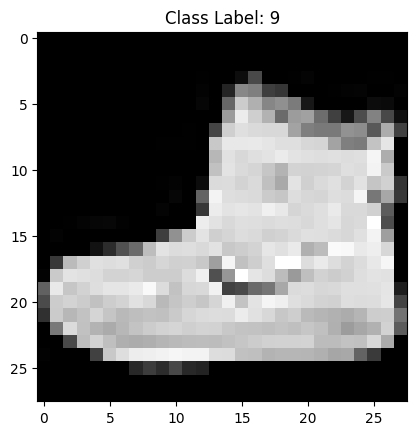

In [2]:
# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the data to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten the data
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)



# Display a sample image
plt.imshow(X_train[0].reshape(28, 28), cmap="gray")
plt.title(f"Class Label: {y_train[0]}")
plt.show()



**Explanation**: 

- **Load the Fashion MNIST Dataset**: This step loads the training and test datasets, including both the images and their associated class labels.
- **Normalize the Data to the Range [0, 1]**: The pixel values are scaled from [0, 255] to [0, 1] to improve the performance and stability of the model during training.
- **Flatten the Data**: The 28x28 pixel images are reshaped into 1D vectors of size 784, making them suitable for use in machine learning models.
- **Display a Sample Image**: A sample image from the training set is displayed with its class label for visualization.

<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python

# Flatten the data
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Display a sample image
plt.imshow(X_train[0].reshape(28, 28), cmap="gray")
plt.title(f"Class Label: {y_train[0]}")
plt.show()
```
</details>

## Task 3: Define and Train the Model Without Batch Normalization

> **Note**:
The code provided defines and trains a neural network model without batch normalization. Depending on the computational resources and dataset size, training the model may take some time. Be patient, as training deep learning models can be time-intensive, especially without optimizations like batch normalization.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model without batch normalization
model_without_bn = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_without_bn.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])




# Train the model
history_without_bn = model_without_bn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)




Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4958 - accuracy: 0.8252 - val_loss: 0.4535 - val_accuracy: 0.8398
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3661 - accuracy: 0.8656 - val_loss: 0.4010 - val_accuracy: 0.8534
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3285 - accuracy: 0.8784 - val_loss: 0.3874 - val_accuracy: 0.8552
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3059 - accuracy: 0.8867 - val_loss: 0.3539 - val_accuracy: 0.8701
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2904 - accuracy: 0.8920 - val_loss: 0.3468 - val_accuracy: 0.8750
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2755 - accuracy: 0.8971 - val_loss: 0.3413 - val_accuracy: 0.8771
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2644 - accuracy: 0.9001 - val_loss: 0.3738 - val_accuracy:

**Explanation**:

In this step, you build a basic neural network without batch normalization. This model serves as the baseline for comparison, allowing us to observe how training progresses without normalization of activations between layers.

<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Compile the model
model_without_bn.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Train the model
history_without_bn = model_without_bn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

    
```
</details>

### Task 4: Define and Train the Model With Batch Normalization



> **Note**:
This code compiles the model using the Adam optimizer and sparse categorical cross-entropy loss, then trains it for 10 epochs with a batch size of 32. The training may take some time depending on your system's resources.

In [4]:
from tensorflow.keras.layers import BatchNormalization

# Define the model with batch normalization
model_with_bn = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Note that batch normalization is typically applied to the input layer and hidden layers, not the output layer. 
# Why it's applied to hidden layers:
# - Stabilizes and normalizes the activations during training.
# - Reduces internal covariate shift, making the training faster and more stable.

# Why it's not applied to the output layer:
# The output layer (especially in classification) often uses an activation function like softmax or sigmoid, 
# which maps values into a specific output range (e.g., probabilities).
# Hence, applying batch normalization after that would distort the output distribution, making the final predictions invalid.

# Compile the model
model_with_bn.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
history_with_bn = model_with_bn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)





Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4909 - accuracy: 0.8271 - val_loss: 0.4279 - val_accuracy: 0.8488
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3895 - accuracy: 0.8592 - val_loss: 0.4379 - val_accuracy: 0.8386
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3641 - accuracy: 0.8669 - val_loss: 0.3761 - val_accuracy: 0.8644
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3374 - accuracy: 0.8766 - val_loss: 0.3731 - val_accuracy: 0.8637
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3245 - accuracy: 0.8798 - val_loss: 0.3803 - val_accuracy: 0.8645
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3117 - accuracy: 0.8855 - val_loss: 0.3699 - val_accuracy: 0.8645
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2972 - accuracy: 0.8907 - val_loss: 0.3834 - val_accuracy:

**Explanation**:

Batch normalization layers are added to the architecture. These layers normalize the activations of each layer, reducing internal covariate shift and potentially improving training speed and stability.

<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python

# Compile the model
model_with_bn.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
history_with_bn = model_with_bn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)
    
```
</details>

### Task 5: Compare Training Convergence Speeds

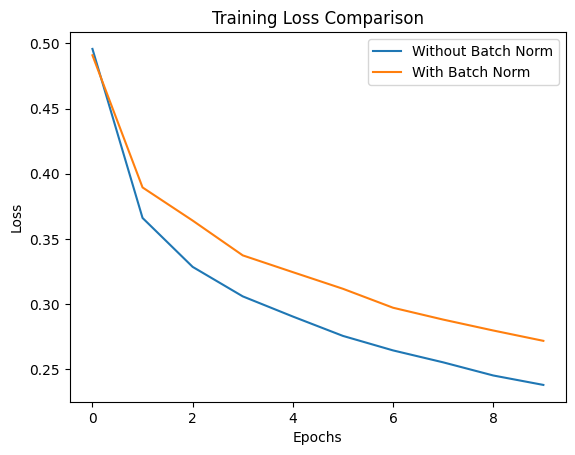

In [5]:
# Plot training loss
plt.plot(history_without_bn.history['loss'], label='Without Batch Norm')
plt.plot(history_with_bn.history['loss'], label='With Batch Norm')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
    




Take note that WITH batch norm, you should observe the following:
     - Smoother loss curve (less noisy)
     - Faster convergence (loss drops more quickly)
     - Lower final loss (better training and generalization)

The curve:
- Steadily decreases
- Has fewer bumps or oscillations
- Plateaus at a lower value

However, the plot tells a different story from what we theoretically expect. The plausible reasons for why this is so is stated below, at the end of this IPYNB, but the TLDR is that the Fashion dataset is not complex enough, and the Adam optimiser was used for both with batch norm and without, which might reduce the observable benefits of batch normalization because Adam already adapts learning rates effectively. The observable benefits of using batch norm would be more obvious for more complex datasets.

**Explanation**:

The training loss of both models is plotted to compare convergence speeds. Batch normalization typically results in smoother loss curves and faster convergence, especially in deeper or more complex networks.

<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Plot training loss
plt.plot(history_without_bn.history['loss'], label='Without Batch Norm')
plt.plot(history_with_bn.history['loss'], label='With Batch Norm')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
    
```
</details>

### Task 6: Evaluate Generalization Performance



In [ ]:
# Evaluate both models on the test dataset
test_loss_without_bn, test_acc_without_bn = model_without_bn.evaluate(X_test, y_test, verbose=0)
test_loss_with_bn, test_acc_with_bn = model_with_bn.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy for the model both with and without batch normalization for comparison
print(f"Test Accuracy Without Batch Norm: {test_acc_without_bn:.4f}")
print(f"Test Accuracy With Batch Norm: {test_acc_with_bn:.4f}")




<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python

print(f"Test Accuracy Without Batch Norm: {test_acc_without_bn:.4f}")
print(f"Test Accuracy With Batch Norm: {test_acc_with_bn:.4f}")
    
```
</details>

**Explanation**:

The models are evaluated on the test set to measure their generalization ability. This step highlights whether batch normalization improves the model's performance on unseen data, focusing on stability and potential overfitting.

### Explaination of outcome:

---

#### **1. Batch Normalization's Purpose**
Start by reinforcing the **primary purpose** of batch normalization:
- **Faster Training Convergence**: It helps models train faster by normalizing inputs to each layer.
- **Regularization Effect**: It can reduce overfitting by adding noise to layer activations during training.

Even if the final accuracies are similar, batch normalization might still have improved the **training process** (e.g., smoother convergence or reduced epochs to achieve similar accuracy).

---

#### **2. Analyze Training Behavior**
Encourage you to compare **training curves** (loss/accuracy over epochs). Explain these possibilities:
- **Convergence Speed**: Did the model with batch normalization converge faster?
- **Smoothness**: Is the loss/accuracy curve smoother for the batch-normalized model, indicating more stable training?
  
If the curves are nearly identical, emphasize that **batch normalization's benefits are more apparent in deeper networks** or with more complex datasets.

---

#### **3. Factors Influencing Batch Normalization's Impact**
Why the results might be similar:
- **Model Architecture**: The current model is relatively shallow. Batch normalization is more effective in **very deep networks**.
- **Dataset Simplicity**: Fashion MNIST is a manageable dataset. Batch normalization's advantages become clearer with **more complex datasets** or highly imbalanced data.
- **Optimizer**: Using Adam (a robust optimizer) might reduce the observable benefits of batch normalization because Adam already adapts learning rates effectively.

---

#### **4. Highlight Generalization Insight**
Why test accuracy might not differ much:
- **Model Capacity**: Both models have sufficient capacity to learn Fashion MNIST. Adding batch normalization didn’t significantly alter this.
- **Overfitting**: Batch normalization acts as a regularizer. However, the dataset may not be complex enough to showcase overfitting issues that batch normalization could mitigate.

---

#### **5. Encourage Further Exploration**
Opportunities to explore:
1. **Increase Model Depth**: Add more layers and observe if batch normalization improves performance.
2. **Use a Complex Dataset**: Try datasets complex datasets, where batch normalization often shows a greater effect.
3. **Alter Hyperparameters**: Experiment with learning rates, optimizers, or dropout alongside batch normalization.

### Key Takeaways

- Batch normalization helps in faster convergence during training.
- It improves generalization by reducing overfitting, especially in deeper networks.
- Training with batch normalization results in more stable and consistent gradients.

### Summary:

In this lab, you implemented and compared a deep neural network with and without batch normalization. By analyzing training losses and test accuracies, you observed the impact of batch normalization on convergence speed and generalization performance. This foundational knowledge is crucial for designing efficient and robust neural network architectures in real-world applications.